# Exploring Weather Trends - Project Instructions


## Summary
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

## Goal

My goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where I live. 
    
----
----

# Project workflow

## Extract the data from the database

I will extract necessary data from database. I will export the temperature data for the world as well as for the closest big city to where you live. I have written SQL query for that.

Firstly, to get the nearest city near me, I checked for all the cities for my country using this command:

`SELECT * from city_list WHERE country = 'Bangladesh'`

- **the city level data:** I collected the data for City Dhaka using the following command

`SELECT * from city_data WHERE city = 'Dhaka'`

and saved it as a csv with name **city_Data.csv**


- **the global data:** for the global data I ran the command

 `SELECT * from global_data` 

and saved it as csv with name **global_Data.csv**

## Open up the CSV

To open up the CSV file, I have used panda library and used matplotlib for plotting.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city_data= pd.read_csv("city_data.csv")
city_data.head(20)

,year,city,country,avg_temp
0,1796,Dhaka,Bangladesh,25.35
1,1797,Dhaka,Bangladesh,26.36
2,1798,Dhaka,Bangladesh,25.22
3,1799,Dhaka,Bangladesh,25.61
4,1800,Dhaka,Bangladesh,25.54
5,1801,Dhaka,Bangladesh,25.14
6,1802,Dhaka,Bangladesh,25.98
7,1803,Dhaka,Bangladesh,25.73
8,1804,Dhaka,Bangladesh,26.05
9,1805,Dhaka,Bangladesh,25.64


In [3]:
city_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,218.0,1904.500000,63.075352,1796.00,1850.25,1904.50,1958.75,2013.00
avg_temp,213.0,25.474085,0.595247,20.49,25.21,25.51,25.85,26.65


In [4]:
global_data= pd.read_csv('global_data.csv')
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
global_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,266.0,1882.500000,76.931788,1750.00,1816.2500,1882.500,1948.7500,2015.00
avg_temp,266.0,8.369474,0.584747,5.78,8.0825,8.375,8.7075,9.83


## Creating line chart

A **line chart** or line plot or line graph or curve chart is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments.

Here I have to create a line chart that compares my city’s temperatures with the global temperatures. I have plotted the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable.

In [6]:
# joining the two csvs data on year column
combine_data= global_data.merge(city_data, how='left', on= "year", 
                                suffixes=('_global', '_city')).drop(['city', 'country'], axis= 1)

In [7]:
combine_data.set_index('year', inplace= True)

## Exploring Trends

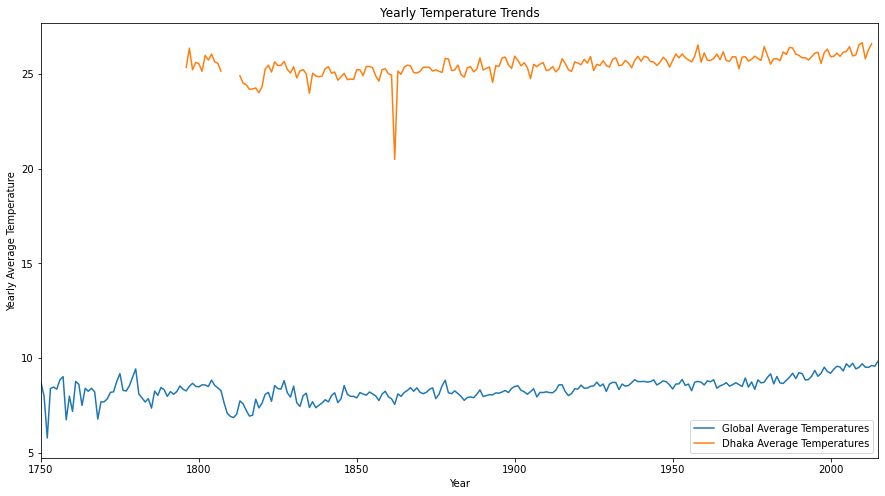

In [8]:
title='Yearly Temperature Trends'
ylabel='Yearly Average Temperature'
xlabel='Year'

fig, ax = plt.subplots()
combine_data.plot(figsize=(15,8), ax=ax , title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "Dhaka Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);

## Moving Averages

**Moving averages** are used to smooth out data to make it easier to observe long term trends and not get lost in daily fluctuations. 

(For example, let's say you wanted to visualize the sales trend at a clothing retail store. You start with daily data, and your chart looks too volatile to interpret because more people shop on the weekends, so sales spike on those days.)

### Five Years Moving Average

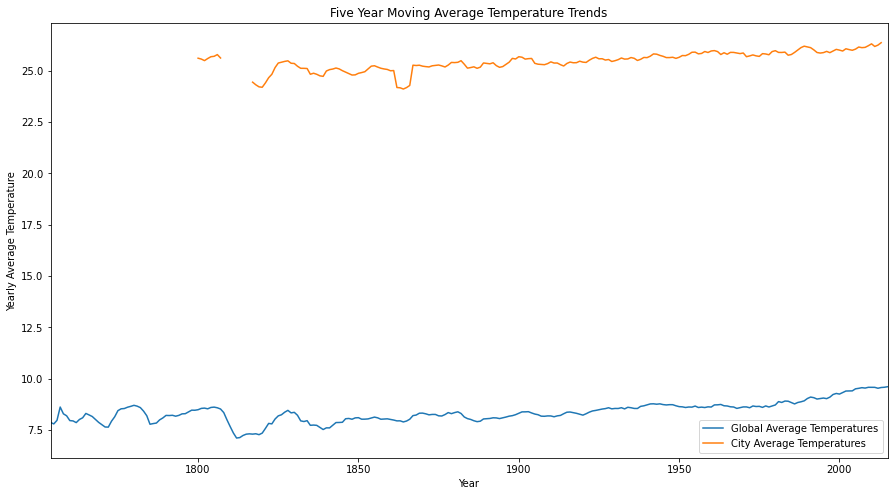

In [9]:
title='Five Year Moving Average Temperature Trends'
ylabel='Yearly Average Temperature'
xlabel='Year'

fig, ax = plt.subplots()
combine_data.rolling(window=5).mean().plot(figsize=(15,8), ax=ax , title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "City Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);

### Ten Years Moving Average

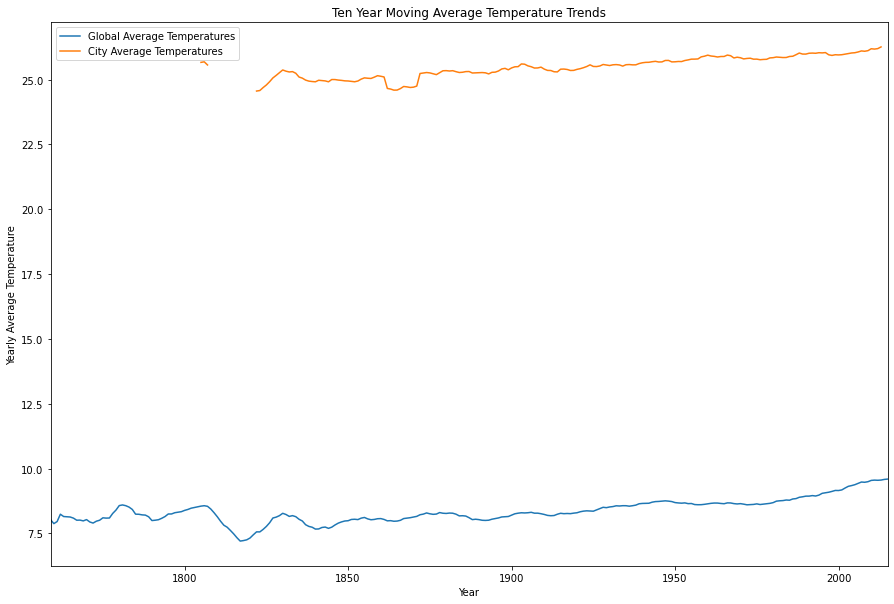

In [10]:
title='Ten Year Moving Average Temperature Trends'
ylabel='Yearly Average Temperature'
xlabel='Year'

fig, ax = plt.subplots()
combine_data.rolling(window=10).mean().plot(figsize=(15,10), ax=ax, title= title).autoscale(axis='x',tight=True)
ax.legend(["Global Average Temperatures", "City Average Temperatures"]);
ax.set(xlabel=xlabel, ylabel=ylabel);


## Observation of the chart line


- Dhaka is a hotter city than the global average, as the temperature is almost more than double.
- Dhaka's temperature suddenly dropped at 1862, and it is gradually increasing. 
- Since 1850 the global temperature has benn increasing quite constantly, while in Dhaka it fluctuated
- Before 1850 the temperature fluctuated more in Dhaka and in the world.
- the line is not fully constant because from year 1808 to 1812, data is missing.
- Even thought for Global data, its available from 1750, but for Bangladesh, Dhaka it is available from 1796.